In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from matplotlib import pyplot as plt

In [2]:
z = {}
m = {}
with fits.open('/home/rt2122/Data/original_catalogs/psz2.fits') as hdul:
    data = hdul[1].data
    z['PSZ2'] = np.array(data['REDSHIFT'])
    m['PSZ2'] = np.array(data['MSZ'])

In [3]:
with fits.open('/home/rt2122/Data/original_catalogs/mcxc.fits') as hdul:
    data = hdul[1].data
    z['MCXC'] = np.array(data['z'])
    m['MCXC'] = np.array(data['M500'])

In [13]:
with fits.open('/home/rt2122/Data/original_catalogs/redmapper.fits.gz') as hdul:
    data = hdul[1].data
    data = data[data['LAMBDA'] > 50]
    z['redMaPPer'] = np.array(data['Z_SPEC'])
    m['redMaPPer'] = m500(np.array(data['LAMBDA']), z['redMaPPer'])

In [8]:
def e(z, omega_m = 0.3, omega_l = 0.7, omega_k = 1):
    return np.sqrt(omega_m * (1 + z) ** 3 + omega_l + omega_k * (1 + z) ** 2)

In [9]:
def my_log(x, base):
    return np.log(x) / np.log(base)

In [12]:
def m500(lmd, z, A=66.1, B=1.14, C=0.73, m_sun=1.988 * (10 ** 30)):
    from scipy.constants import h
    divider = m_sun * 10 ** 14
    divider = 10 ** 33 * 5
    divider=1
    return my_log(lmd  / (A * (e(z) / e(0.6)) ** C), B)\
        * 3 / (h * divider)

In [14]:
def overlaid_histogram(data1, data2, data3, n_bins = 0, 
                       data1_name="", data1_color="#539caf", 
                       data2_name="", data2_color="#7663b0", 
                       data3_name = "", data3_color="#ffff00", 
                       x_label="", y_label="", title=""):
    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2), min(data3)), 
                  max(max(data1), max(data2), max(data3))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins


    bins = n_bins

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 0.75, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.hist(data3, bins = bins, color = data3_color, alpha = 0.75, label = data3_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

In [15]:
cats = [cat for cat in z]

In [16]:
for cat in z:
    z[cat] = z[cat][z[cat] != -1]

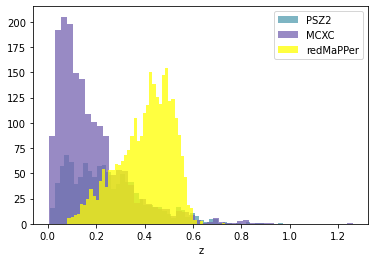

In [17]:
overlaid_histogram(*[z[cat] for cat in z], n_bins=50, 
                   data1_name=cats[0], data2_name=cats[1], data3_name=cats[2], 
                  x_label='z')

In [18]:
for cat in m:
    m[cat] = m[cat][m[cat] > 0]

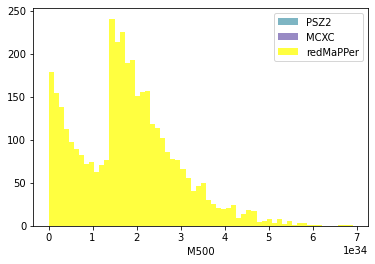

In [19]:
overlaid_histogram(*[m[cat] for cat in z], n_bins=60, 
                   data1_name=cats[0], data2_name=cats[1], data3_name=cats[2], 
                  x_label='M500')

In [88]:
for cat in m:
    print(cat, m[cat].min(), m[cat].max())

PSZ2 0.7850758 16.116468
MCXC 0.0096 22.1
redMaPPer 6.816564e+30 6.918015e+34
